<a href="https://colab.research.google.com/github/EldritchBear/ADA-Informes/blob/main/CaminoM%C3%A1sCorto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Descripción del problema

El problema del camino más corto busca encontrar la distancia más corta desde un nodo **v** a un nodo **w**. Dependiendo del tipo de gráfo, si este contiene arcos negativos o no, va a tener que resolverse mediante un algoritmo u otro, en este informe se implementara el algoritmo de **Dijkstra**, el cual solo sirve para gráfos con arcos positivos, mientras que el algoritmo **Bellman-Ford** soporta arcos tanto negativos como positivos.

**Entrada:** Un grafo dirigido $G = (V,E)$ con valores asociados a sus arcos y su vertice fuente "v".

**Salida:** Se retorna la distancia más corta para cada vértice "v" o en caso de que el gráfo contenga un ciclo negativo el algoritmo lo reconocerá y detendrá la ejecucción.

#2. Descripción del algoritmo


##2.1 Ejemplo

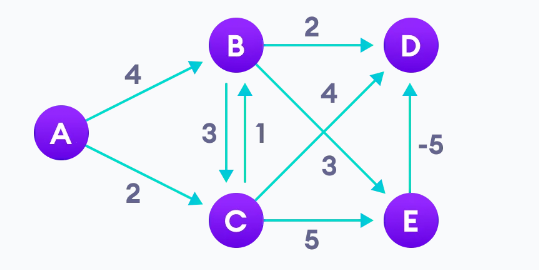

Primero se recibe un grafo dirigido, el algoritmo de Bellman-Sort no tiene problema con que el peso de sus arcos sea negativo.

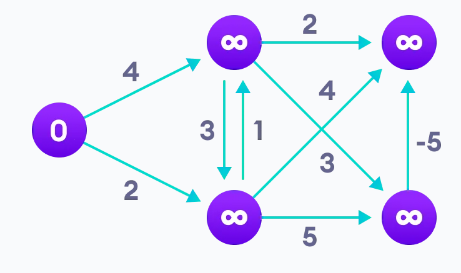

Se elige un nodo de inicio y se asigna infinito a todos los nodos.

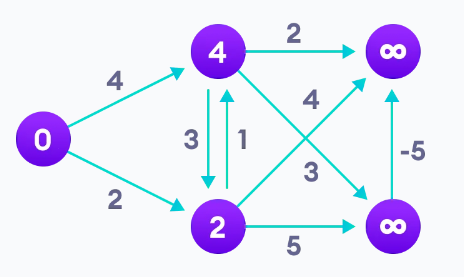

Se visita cada nodo y se relajan los nodos si las distancias son imprecisas

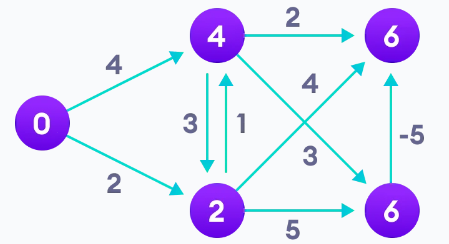

Se realiza el paso anterior una cantidad de "V" veces, debido que en el peor caso, el camino más corto necesita recalcularse "V" veces.

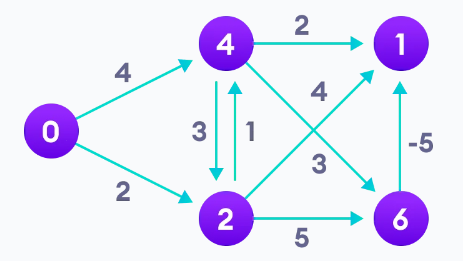

En el ejemplo anterior se puede ver como la esquina superior derecha fue recalculado

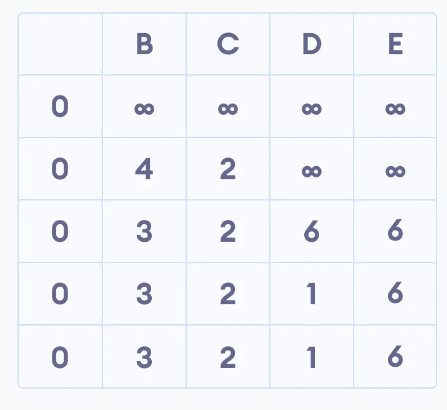

Por último revisamos si existe un ciclo negativo, esto se realiza con una última relajación de nodos, si los datos son distintos (menores) significa que existe un ciclo negativo.

##2.2 Algoritmo Bellman-Ford

El algoritmo de **Bellman-Ford** funciona de la siguiente manera:

1. Se inicializa un arreglo de distancias de tamaño **V** con todos los valores menos el del nodo fuente como **infinito**

2. Se comienza a calcular la distancia entre los nodos, esto se realiza según la función de recurrencia, la cual es:

  $L_{i,v} =
  \min \left\{
  \begin{array}{cc}
  L_{i-1,v} & \text{(Caso 1)} \\
  \min\limits_{(w,v)\in E} \{L_{i-1,w}+l+{wv}\} & \text{(Caso 2)}
          \end{array}
  \right\}$

3. Si el algoritmo detecta un ciclo negativo se muestra por pantalla que se encontró un ciclo y se detiene el algoritmo. El algoritmo detecta un ciclo negativo si $dist[v] > dist[u] + arco uv$.

4. Si el algoritmo no encontro un ciclo negativo se muestra la distancia minima de cada nodo.

**SubEstructura Óptima**

La subestructura del algoritmo Bellmann-Ford se basa en ir calculando el camino más corto desde el nodo "s" a cualquier otro nodo. Para esto existen dos casos:

1. Si se conoce la cantidad de arcos de la ruta óptima, se deben calcular los caminos más cortos entre "s" y "v" se tienen que calcular primero el camino más corto desde "s" a un nodo intermidiario "w", para finalmente a esto sumarle la distancia entre "w" y "v".

2. Si no se conoce la cantidad de arcos el camino más corto corresponde al camino más corto con i - 1 arcos o menos que se encuentre, con i ≥ 1.

##2.3 Algoritmo de Dijkstra

El algoritmo de **Dijkstra** funciona de la siguiente forma:

1.  Se inicializa un arreglo de tamaño **V** con valores infinitos.

2.  Se elige un nodo que no esté en el conjunto y tenga valor de distancia mínimo, este valor es luego ingresado al conjunto. 

3. Se comienzan a iterar sobre los nodos adyacentes actualizando los valores los valores de distancia de cada uno.

4. Finalmente se retorna la lista con los valores.

##2.4 Implementación del algoritmo Bellman-Ford

In [ ]:
import random

def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0]

In [ ]:
import networkx as nx


def graph_to_nxdigraph(graph: list, n: int):
    """
        Input: Un grafo en formato list[tuple]. Ej: [(0, 1, 10), (1, 2, 15), (2, 0, 7)].
        Output: Un nx.DiGraph de la libreria networkx.
    """
    nxdigraph = nx.DiGraph()
    [nxdigraph.add_node(i) for i in range(n)]

    for v in graph:
        nxdigraph.add_edge(v[0], v[1], weight=v[2])

    return nxdigraph

In [163]:
import matplotlib.pyplot as plt

def bellmanFord(array,v,e,s,verbose):
  L = [float("inf")] * v                                                        #se inicializa la lista de distancias
  L[s] = 0
  flag = False

  if verbose:
    print(f"se crea una lista de tamaño {v}\n")

  for i in range(v-1):                                                          #se recorren los nodos y sus arcos calculando la distancia de los nodos aplicando la
    for j in range(e):                                                          #funcion de recurrencia
      if verbose:
        print(f"se revisa si {L[array[j][0]] + array[j][2]} < {L[array[j][1]]}")
      if L[array[j][0]] + array[j][2] < L[array[j][1]]:
        if verbose:
          print(f"se actualiza la distancia cambiando {L[array[j][1]]} por {L[array[j][0]] + array[j][2]}\n")
        L[array[j][1]] = L[array[j][0]] + array[j][2]

  if verbose:
    print("\nse comprueba si existe un ciclo negativo")

  for i in range(e):                                                            #se busca el peso entre dos nodos 
    x = array[i][0]
    y = array[i][1]
    aux = array[i][2]
    if L[x] != float("inf") and L[x] + aux < L[y]:                              #se verifica si se encuentra un ciclo negativo
      print("se ha encontrado un ciclo negativo")
      flag = True

  if verbose == True and flag == False:
    print("no se ha encontrado ciclo negativo\n")
      
  return L

### Implementación con verbose (y visualize)

se crea una lista de tamaño 5

se revisa si -22 < inf
se actualiza la distancia cambiando inf por -22

se revisa si inf < 0
se revisa si inf < 0
se revisa si inf < inf
se revisa si -47 < inf
se actualiza la distancia cambiando inf por -47

se revisa si 73 < -47
se revisa si 72 < inf
se actualiza la distancia cambiando inf por 72

se revisa si 152 < -47
se revisa si 126 < -47
se revisa si -22 < -22
se revisa si inf < 0
se revisa si -15 < 0
se actualiza la distancia cambiando 0 por -15

se revisa si 33 < inf
se actualiza la distancia cambiando inf por 33

se revisa si -47 < -47
se revisa si 73 < -47
se revisa si 72 < 72
se revisa si 152 < -47
se revisa si 126 < -47
se revisa si -37 < -22
se actualiza la distancia cambiando -22 por -37

se revisa si 94 < -15
se revisa si -15 < -15
se revisa si 33 < 33
se revisa si -62 < -47
se actualiza la distancia cambiando -47 por -62

se revisa si 58 < -62
se revisa si 57 < 72
se actualiza la distancia cambiando 72 por 57

se revisa si 137 < -62
se re

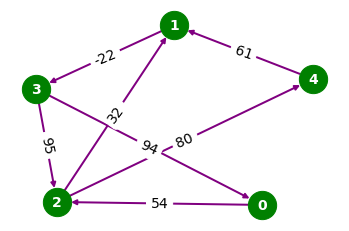

In [161]:
A,S = instance_generator(5)
verbose = True
L = bellmanFord(A,5,len(A),S,verbose)

for i in range(5):
    print(f"Camino más corto desde el nodo {S} al nodo {i}: {L[i]}")


#visualize momento

grafo = graph_to_nxdigraph(A,5)
pos=nx.spring_layout(grafo,20)
labels = nx.get_edge_attributes(grafo,'weight')
nx.draw_networkx_edge_labels(grafo,pos,edge_labels=labels,font_size=14)
nx.draw(grafo,pos, with_labels=True,node_color = "green", node_size=800, font_color="white", font_size=14, font_weight="black", width  =2.0, edge_color ="purple")

###Implementación sin verbose

In [164]:
grafo,fuente = instance_generator(10)
verbose = False
L = bellmanFord(grafo,10,len(A),fuente,verbose)

for i in range(10):
    print(f"Camino más corto desde el nodo {fuente} al nodo {i}: {L[i]}")


Camino más corto desde el nodo 9 al nodo 0: inf
Camino más corto desde el nodo 9 al nodo 1: 73
Camino más corto desde el nodo 9 al nodo 2: inf
Camino más corto desde el nodo 9 al nodo 3: inf
Camino más corto desde el nodo 9 al nodo 4: 27
Camino más corto desde el nodo 9 al nodo 5: 86
Camino más corto desde el nodo 9 al nodo 6: 37
Camino más corto desde el nodo 9 al nodo 7: inf
Camino más corto desde el nodo 9 al nodo 8: inf
Camino más corto desde el nodo 9 al nodo 9: 0


##2.5 Implementación del algoritmo de Dijkstra

In [ ]:
def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator_dijkstra(n: int):                                        #el unico cambio que tiene son los valores de los arcos para no tener negativos
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(1, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0]

In [ ]:
def listT_to_matrix(grafo, V):
    edges = len(grafo)                                                          #se transforma el grafo a una matriz
    newGraph = [[0 for i in range(V)] for j in range(V)]

    for node in range(edges):
        for (x, y, peso) in grafo:
            newGraph[x][y] = peso

    return newGraph

In [ ]:
def minDistance(V, dist, visitado,verbose):
  min = float("inf")
  min_index = 0

  if verbose:
    print("se comienza a buscar el camino más corto entre un nodo a otro")

  for u in range(V):
    if dist[u] < min and visitado[u] == False:                               #se calcula la distancia minima entre un nodo a otro
      if verbose:
        print(f"se compara {dist[u]} > {min}")
        print(f"se actualiza el valor del camino más corto")
      min = dist[u]
      min_index = u
    
  return min_index

In [167]:
def Dijkstra(grafo, V ,s,verbose):
  dist = [float("inf")] * V                                                     #se inicializa un arreglo tamaño v con las distancias
  dist[s] = 0                                                                   #la distancia de el nodo a el mismo es 0
  visitado = [False] * V

  if verbose:
    print(f"se inicia una lista de tamaño {V} para guardar los valores de distancia\n")
 
  for cout in range(V):                                                         #se calcula la distancia minima de un nodo a otro y luego se compara si es la menor
    x = minDistance(V, dist, visitado,verbose)
      
    if verbose:
      print(f"camino más corto hasta el nodo {x} es: {dist[x]}")

    visitado[x] = True

    for y in range(V):
      if grafo[x][y] > 0 and visitado[y] == False and dist[y] > dist[x] + grafo[x][y]:
        if verbose:
          print(f"se revisa si {dist[y]} es menor a {dist[x] + grafo[x][y]}, en caso de que sea menor significa que se ha encontrado un valor menor al anterior")
          print(f"por lo que existe relajación de nodos\n")
        dist[y] = dist[x] + grafo[x][y]

  return dist

###Implementación con verbose

In [168]:
grafo,s = instance_generator_dijkstra(10)
grafo = listT_to_matrix(grafo,10)
verbose = True

L = Dijkstra(grafo,10,s,verbose)
for node in range(10):
  print(node, "\t", L[node])

se inicia una lista de tamaño 10 para guardar los valores de distancia

se comienza a buscar el camino más corto entre un nodo a otro
se compara 0 > inf
se actualiza el valor del camino más corto
camino más corto hasta el nodo 3 es: 0
se revisa si inf es menor a 12, en caso de que sea menor significa que se ha encontrado un valor menor al anterior
por lo que existe relajación de nodos

se revisa si inf es menor a 21, en caso de que sea menor significa que se ha encontrado un valor menor al anterior
por lo que existe relajación de nodos

se comienza a buscar el camino más corto entre un nodo a otro
se compara 12 > inf
se actualiza el valor del camino más corto
camino más corto hasta el nodo 0 es: 12
se revisa si inf es menor a 81, en caso de que sea menor significa que se ha encontrado un valor menor al anterior
por lo que existe relajación de nodos

se revisa si inf es menor a 101, en caso de que sea menor significa que se ha encontrado un valor menor al anterior
por lo que existe rela

###Implementación sin verbose

In [169]:
grafo,s = instance_generator_dijkstra(10)
grafo = listT_to_matrix(grafo,10)
verbose = False

L = Dijkstra(grafo,10,s,verbose)
print("Camino más corto a los nodos")
for node in range(10):
  print(node, "\t", L[node])

Camino más corto a los nodos
0 	 106
1 	 193
2 	 286
3 	 88
4 	 24
5 	 115
6 	 133
7 	 0
8 	 129
9 	 103


#3. Tiempo de ejecución

##3.1 Algoritmo Bellman-Ford
El algoritmo de Bellman-Ford tiene los siguientes tiempos de ejecuciones para los distintos casos:

**Peor Caso:** En este caso el algoritmo toma una complejidad temporal de $O(V^3)$, esto se produce cuando en la primera iteración ya se calculó el camino más corto pero el algoritmo no se detiene y sigue con el analisis, lo que significa que la complejidad completa es de:

$O(E*V) = O(V^2) * O(V)$

donde $O(V^2)$ viene siendo de el algoritmo habiendo calculado en las primeras iteraciones el camino más corto pero continua con las iteraciones.

**Caso Promedio:** El caso promedio viene dado por $O(E*V)$, osea la cantidad de nodos por la cantidad de vertices. Este caso nace de arreglar el problema que mantiene el peor caso, donde este luego de calcular el camino más corto este sigue iterando, en el caso promedio se verifica si se estan realizando cambios, en caso de que no se realicen cambios el algoritmo entiende que no existe un mejor camino más corto, por lo que termina con las iteraciones.

**Mejor Caso:** El mejor caso viene dado por $O(E)$, esto sucede cuando los nodos toman un camino lineal, es decir cada nodo tiene solo un arco.

**Complejidad Espacial:** $O(V)$, siendo esto la cantidad de nodos.

##3.2 Algoritmo de Dijkstra

El algoritmo Dijkstra presenta una complejidad espacial de $O(V^2)$, esto se debe a que para visitar cada nodo y procesarlo ambos de estos procesos es de $O(V)$, por lo que finalmente tendriamos que:

$O(V)*O(V) = O(V^2)$

Al tener que visitar y procesar estos "v" nodos terminamos teniendo que la complejidad de este algoritmo es de $O(V^2)$.

**Complejidad Espacial:** $O(V^2)$, esto se debe que el algoritmo de Dijkstra utiliza una matriz para ir almacenando los datos.


#4. Correctitud

Si el algoritmo de Bellman-Ford recibe un grafo sin ciclos negativos este calcula correctamente su camino más corto.

Esto puede ser demostrado mediante inducción.

**Caso Base:** si k = 0 tenemos que $dist_{k}$ = 0 para V = S, esto es debido que el camino de un nodo a sí mismo es de 0.

**Hipótesis Inductiva:** Despues de cada iteración "i", para cada nodo "v" se tiene que $dist(s,v)$ es el camino más corto.

**Paso Inductivo:** Supongamos que la hipótesis se mantiene para "i+1"
Sea u un nodo de v, asumiremos que existe una ruta más corta entre s y u, sea u el nodo anterior a v en esta ruta.

Por hipótesis inductiva, sabemos que $dist(u,i)$ es la distancia más corta entre el nodo raíz s y el nodo u. En la iteración i+1, nos aseguramos que se cumple $dist(v,i+1) =< dist(u,i) + w(u,v)$ por el paso de reajuste del algoritmo, y tenemos también que $dist(v,i+1)$ es mayor o igual al largo del camino que utiliza al meno i+1. Por lo tanto, $dist(v,i+1)$ es el largo del camino más corto entre s y v utilizando máximo i+1 arcos.

Después de n-1 iteraciones, para cada nodo v, la $dist(v,n-1)$ es el largo del camino más corto desde el nodo raíz hasta el nodo v utilizando como máximo n-1 arcos. 

#5. Experimentos

##Experimento 1

Aqui se va a comparar el tempo de ejecución del algoritmo Bellman-Ford con su tiempo teórico.

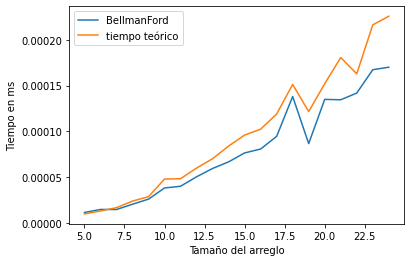

In [166]:
import random
import numpy as np
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]; y2=[]


for n in range(5,25):
  
  a, b = instance_generator(n)
  
  t1 = repeat(setup="from __main__ import bellmanFord", stmt=f"bellmanFord({a},{n},{len(a)},{b},{False})", repeat=1, number=10)
  
  media = 0
  media = t1[0]/25
  
  x.append(n)
  y.append(media)
  y2.append(n*len(a)/5000000)

plt.plot(x, y)
plt.plot(x,y2)

plt.legend([ "BellmanFord","tiempo teórico"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

Para que el algoritmo se grafique de manera correcta hay que ajustar la escala dividiendo por 5 millones (V*E), esto es la escala a la que se resuelven los subproblemas. Podemos ver que efectivamente ambos tiene una gráfica similar, con algunos peaks debido a elementos externos del algoritmo, como la potencia del procesador por ejemplo.

##Experimento 2

Aquí se quiere comparar el algoritmo de Bellman-Ford y de Dijkstra para comparar su tiempo de ejecución.

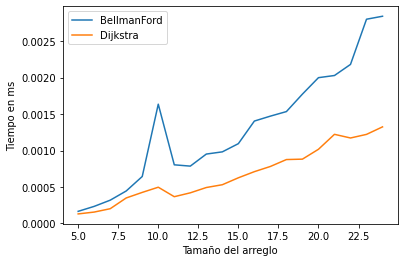

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]; y2=[]


for n in range(5,25):
  
  a, b = instance_generator(n)
  c = listT_to_matrix(a,n)
  
  t1 = repeat(setup="from __main__ import bellmanFord", stmt=f"bellmanFord({a},{n},{len(a)},{b},{False})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import Dijkstra", stmt=f"Dijkstra({c},{n},{b},{False})", repeat=1, number=10)
  
  x.append(n)
  y.append(t1)
  y2.append(t2)


plt.plot(x, y)
plt.plot(x,y2)
plt.legend([ "BellmanFord","Dijkstra"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

##Analisis de los resultados

Como se puede ver en el gráfico anterior el algoritmo de Dijkstra es más eficiente que el algoritmo de Bellman-Ford, esto se debe a que la complejidad del algoritmo Dijkstra es menor al de Bellman-Ford en la mayoria de sus casos. Una desventaja que tiene el algoritmo de Dijkstra frente al Bellman-Ford es que este último puede soportar soportar arcos con pesos negativos, mientras que Dijkstra puede funcionar con estos puede que el resultado no sea correcto o que no sea consistente.